# Copernicus Atmosphere using ECMWFSearch plugin

In this tutorial we will show you how to use eodag to download data from providers using [ECMWFSearch](../../plugins_reference/generated/eodag.plugins.search.build_search_result.ECMWFSearch.rst) `eodag` plugin. You can currently find three providers that uses it, `cop_ads`, `cop_cds` and `cop_ewds`. For this tutorial we will use `cop_ads`, but `cop_cds` and `cop_ewds` are used the same way.

In [1]:
from eodag import EODataAccessGateway, setup_logging

setup_logging(1)  # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG
dag = EODataAccessGateway()
dag.set_preferred_provider("cop_ads")

## Search (build download request)

### Validation

Requests on these collections require some search-parameters to be set. If none is set, validation will prompt an error:

In [2]:
setup_logging(2)

dag.search(provider="cop_ads", collection="CAMS_EAC4")

2025-10-19 18:41:04,464 eodag.core                       [INFO    ] Searching on provider cop_ads
2025-10-19 18:41:07,060 eodag.core                       [ERROR   ] Error while searching on provider cop_ads (ignored):
Traceback (most recent call last):
  File "/home/sylvain/workspace/eodag/eodag/plugins/search/base.py", line 440, in validate
    self.list_queryables(
  File "/home/sylvain/workspace/eodag/.venv/lib/python3.9/site-packages/pydantic/main.py", line 705, in model_validate
    return cls.__pydantic_validator__.validate_python(
pydantic_core._pydantic_core.ValidationError: 2 validation errors for Queryables
ecmwf:variable
  Field required [type=missing, input_value={'collection': 'CAMS_EAC4'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
ecmwf:time
  Field required [type=missing, input_value={'collection': 'CAMS_EAC4'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing

The above exc

SearchResult (0)


### Check available queryables and default values:

Available queryables parameters and associated values can be checked using [list_queryables()](../api_user_guide/4_queryables.ipynb) method, or through [cop_ads](https://ads-beta.atmosphere.copernicus.eu/datasets/cams-global-reanalysis-eac4?tab=download) or [cop_cds](https://cds-beta.climate.copernicus.eu/datasets) websites:

In [3]:
queryables = dag.list_queryables(provider="cop_ads", collection="CAMS_EAC4")
queryables

QueryablesDict (8) - additional_properties=False
"FieldInfo(annotation=NoneType, required=True, title='Variable', description='Please, consult the product user guide in the documentation section for more information on these variables.')"
"list[typing.Literal['1', '10', '100', '1000', '150', '2', '20', '200', '250', '3', '30', '300', '400', '5', '50', '500', '600', '7', '70', '700', '800', '850', '900', '925', '950']],"
"FieldInfo(annotation=NoneType, required=False, default=None, title='Pressure level')"
"list[typing.Literal['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '7', '8', '9']],"
"FieldInfo(annotation=NoneType, required=False, default=None, title='Model level', description=""Model level 1 is the top of the atmosphere. Model level 60 is the Earth's surface."")"
"list[typing.Literal['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']],"
"FieldInfo(annotation=NoneType, required=True, title='Time', description='Model base time as HH:MM (UTC)')"
"typing.Literal['grib', 'netcdf_zip'],"
"FieldInfo(annotation=NoneType, required=False, default=None, title='Data format', description='Please select a format for the data files, the native format of MARS dataset is GRIB.')"
"str,"


In [4]:
# allowed values for "ecmwf:variable"
list(queryables["ecmwf:variable"].__args__[0].__args__[0].__args__)

['10m_u_component_of_wind',
 '10m_v_component_of_wind',
 '2m_dewpoint_temperature',
 '2m_temperature',
 'acetone',
 'acetone_product',
 'aldehydes',
 'amine',
 'ammonia',
 'ammonium',
 'black_carbon_aerosol_optical_depth_550nm',
 'carbon_monoxide',
 'dimethyl_sulfide',
 'dinitrogen_pentoxide',
 'dust_aerosol_0.03-0.55um_mixing_ratio',
 'dust_aerosol_0.55-0.9um_mixing_ratio',
 'dust_aerosol_0.9-20um_mixing_ratio',
 'dust_aerosol_optical_depth_550nm',
 'ethane',
 'ethanol',
 'ethene',
 'formaldehyde',
 'formic_acid',
 'fraction_of_cloud_cover',
 'geopotential',
 'high_cloud_cover',
 'high_vegetation_cover',
 'hydrogen_peroxide',
 'hydroperoxy_radical',
 'hydrophilic_black_carbon_aerosol_mixing_ratio',
 'hydrophilic_organic_matter_aerosol_mixing_ratio',
 'hydrophobic_black_carbon_aerosol_mixing_ratio',
 'hydrophobic_organic_matter_aerosol_mixing_ratio',
 'hydroxyl_radical',
 'isoprene',
 'lake_cover',
 'land_sea_mask',
 'lead',
 'leaf_area_index_high_vegetation',
 'leaf_area_index_low_veg

Here we can see the list of available values for `variable` and that it's a required parameter.

### Search from an existing collection:

In [5]:
products_from_collection = dag.search(
    collection="CAMS_EAC4",
    variable=["2m_dewpoint_temperature"],
    start="2021-01-01",
    end="2021-01-02",    
    time=["00:00"],
)
products_from_collection

2025-10-19 18:41:11,257 eodag.core                       [INFO    ] Searching on provider cop_ads


SearchResult([EOProduct(id=CAMS_EAC4_ORDERABLE_950bc35537fd060220072aaede46c17ab2a45321, provider=cop_ads)])

### Search using a custom request:

If you know the collection / dataset id from `cop_ads` provider, you can also directly use it as collection, you will get the same result:

In [6]:
products_from_ads_req = dag.search(
    provider="cop_ads",
    collection="cams-global-reanalysis-eac4",
    variable=["2m_dewpoint_temperature"],
    start="2021-01-01",
    end="2021-01-02",    
    time=["00:00"],
)

# "eodag:order_link" property must be the same with the two request methods,
# as they are built from the same ADS request arguments
if (
    products_from_ads_req[0].properties["eodag:order_link"]
    == products_from_collection[0].properties["eodag:order_link"]
):
    print(
        "Request using collection or directly ADS dataset result to the\n",
        "same 'eodag:order_link' %s"
        % (
            products_from_ads_req[0].properties["eodag:order_link"],
        )
    )


2025-10-19 18:41:13,808 eodag.core                       [INFO    ] unknown collection cams-global-reanalysis-eac4
2025-10-19 18:41:13,811 eodag.plugins.manager            [INFO    ] UnsupportedCollection: cams-global-reanalysis-eac4, using generic settings
2025-10-19 18:41:13,814 eodag.core                       [INFO    ] Searching on provider cop_ads


Request using collection or directly ADS dataset result to the
 same 'eodag:order_link' https://ads.atmosphere.copernicus.eu/api/retrieve/v1/processes/cams-global-reanalysis-eac4/execution?{"inputs": {"date": "2021-01-01/2021-01-02", "time": ["00:00"], "variable": ["2m_dewpoint_temperature"]}}


### Send product retrieval request, download when available and return an `xarray.DataArray`

- download performed using ADS credentials set in `~/.config/eodag/eodag.yml` as for other EO providers:
```yaml
    cop_ads:
        priority:
        download:
            output_dir: /my/path/to/data/eodag_data
        auth:
            credentials:
                apikey: myapikey
```
- you can check your request status from https://ads.atmosphere.copernicus.eu/requests?tab=all
- See [support](https://ads.atmosphere.copernicus.eu/help) for any problem related to the provider

In [8]:
# Get XarrayDict
xd = products_from_ads_req[0].to_xarray()
xd

0.00B [00:00, ?B/s]

2025-10-19 18:41:24,244 eodag.download.base              [INFO    ] Download url: Not Available
2025-10-19 18:41:25,375 eodag.download.base              [INFO    ] Download link is not available


2025-10-19 18:41:39,088 eodag.product                    [INFO    ] Remote location of the product is still available through its 'remote_location' property: https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache-3/2025-10-19/12d380fdd337555815ca597daef056d1.grib


XarrayDict (1)


In [10]:
# DataArray from XarrayDict first value
da = next(iter(xd.values())).d2m
da

<xarray.DataArray 'd2m' (time: 2, latitude: 241, longitude: 480)> Size: 925kB
[231360 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 16B 2021-01-01 2021-01-02
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
  * longitude   (longitude) float64 4kB 0.0 0.75 1.5 2.25 ... 357.8 358.5 359.2
    valid_time  (time) datetime64[ns] 16B ...
Attributes: (12/31)
    GRIB_paramId:                             168
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      115680
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2d
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre dewpoint temperature
    units:                                    K
    standard_name:                            unknown

## Plot using cartopy

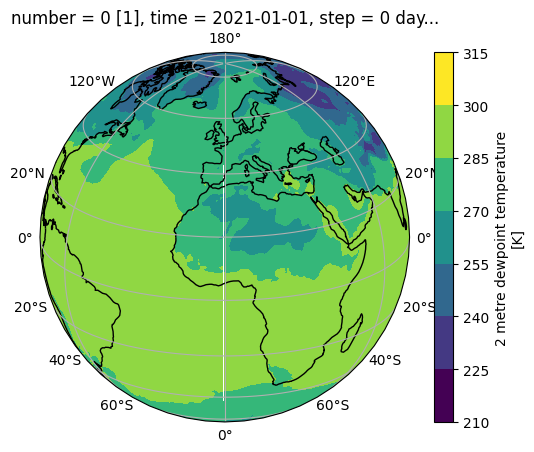

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Orthographic(0, 20))
ax.coastlines()
ax.gridlines(draw_labels=True)
da[0].plot.contourf(ax=ax, transform=ccrs.PlateCarree())